In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy.linalg as la

from data import *
from models import *
from plotter import *

# Below snippit taken from PyTorch quickstart tutorial
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cpu


In [2]:
#load the saved models
model_rank2 = torch.load("model_rank2.pt")
model_rank1 = torch.load("model_rank1.pt")

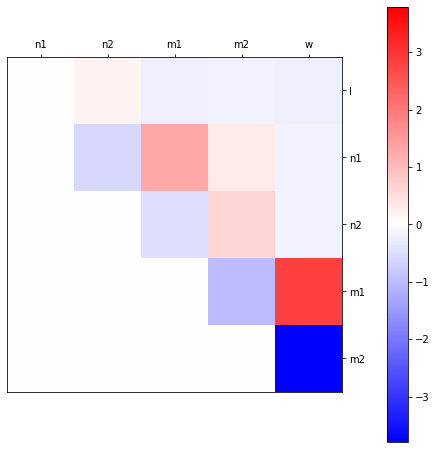

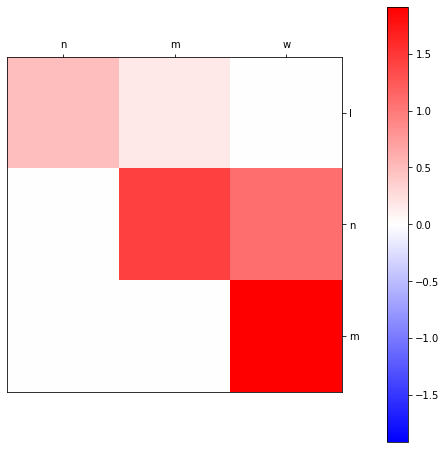

In [3]:

visCov(model_rank2,flip_m_n=True)
visCov(model_rank1,flip_m_n=True)

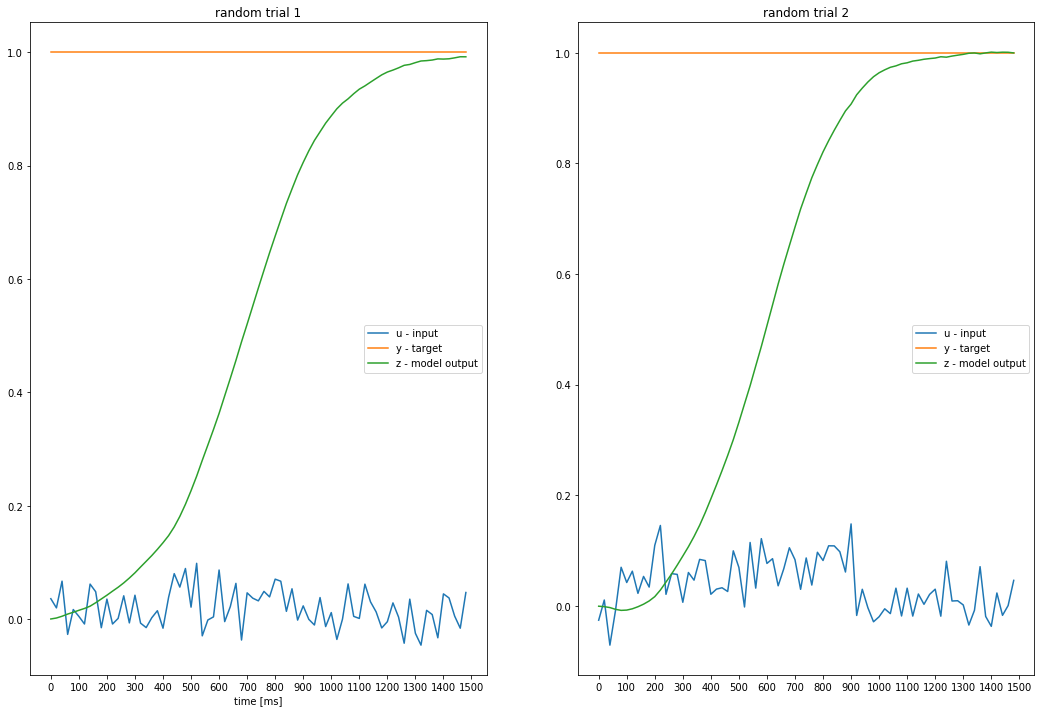

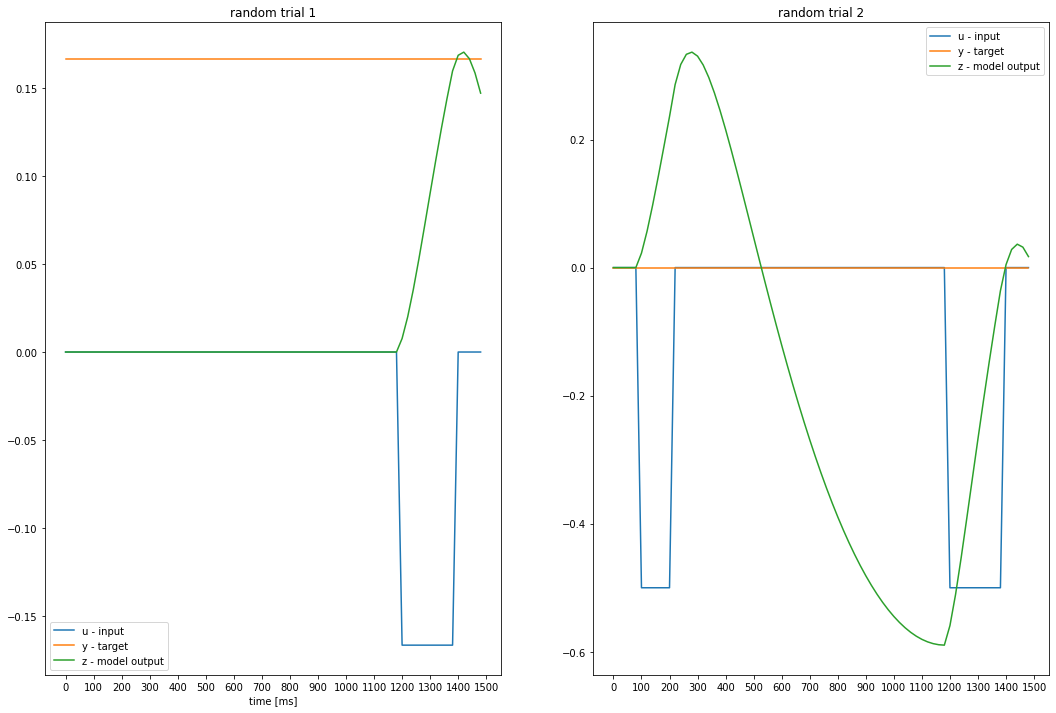

In [4]:
visITO(SingleDecisionDataset, model_rank1)

visITO(ParametricDataset, model_rank2)

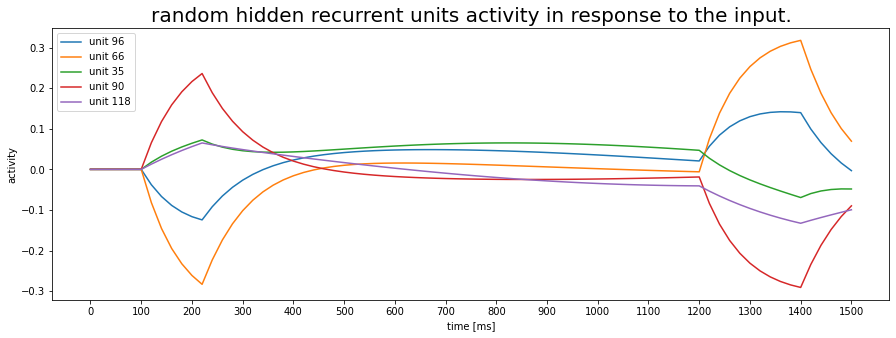

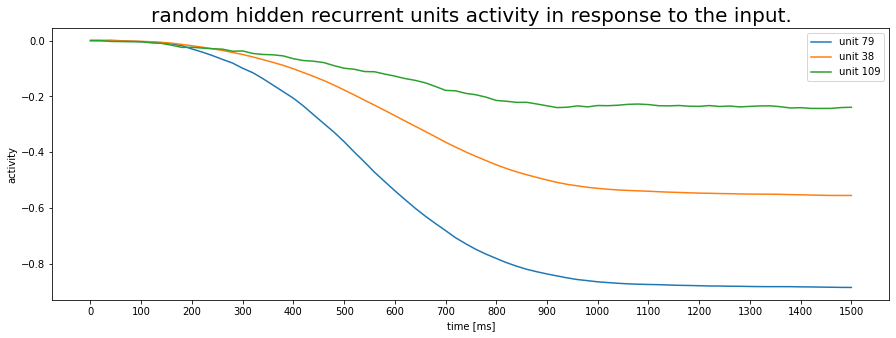

In [5]:
visUA(ParametricDataset, model_rank2)
visUA(SingleDecisionDataset, model_rank1)


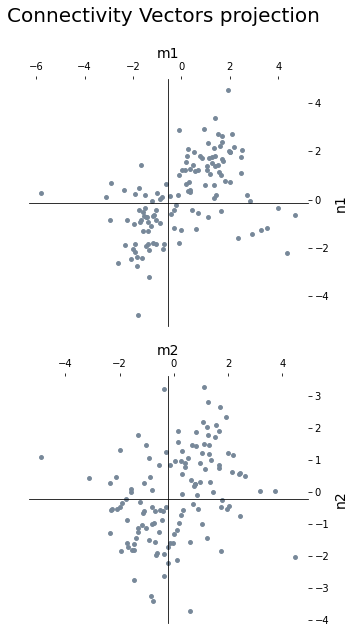

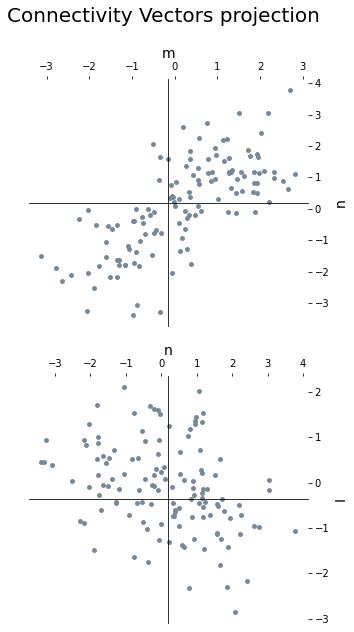

In [6]:
visWP(model_rank2)
visWP(model_rank1)

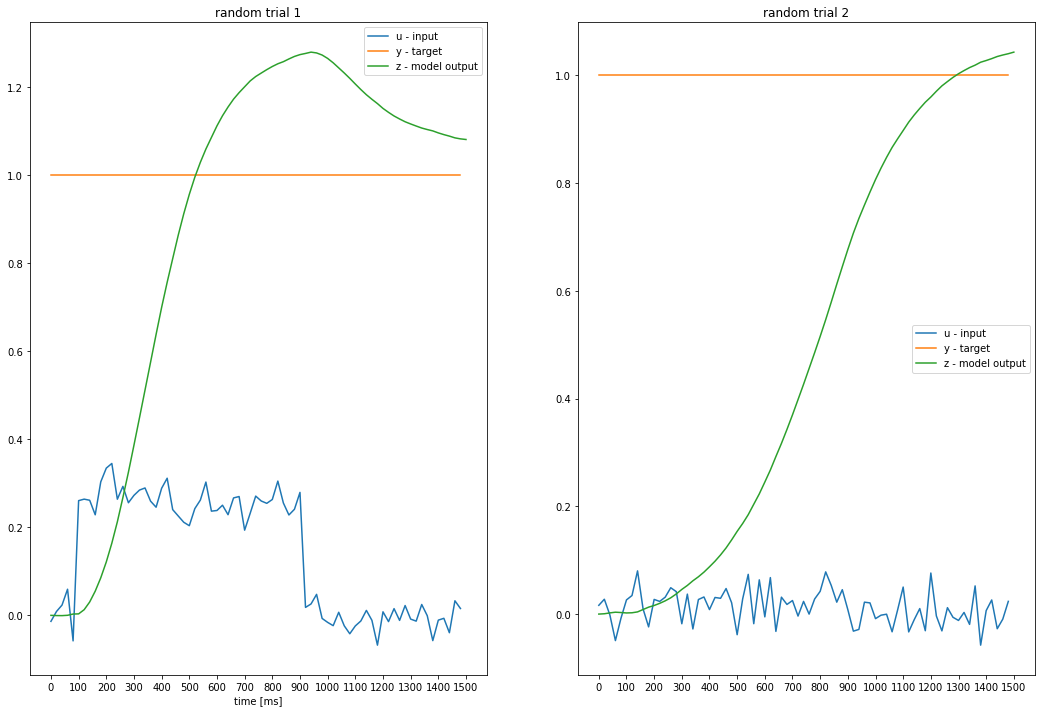

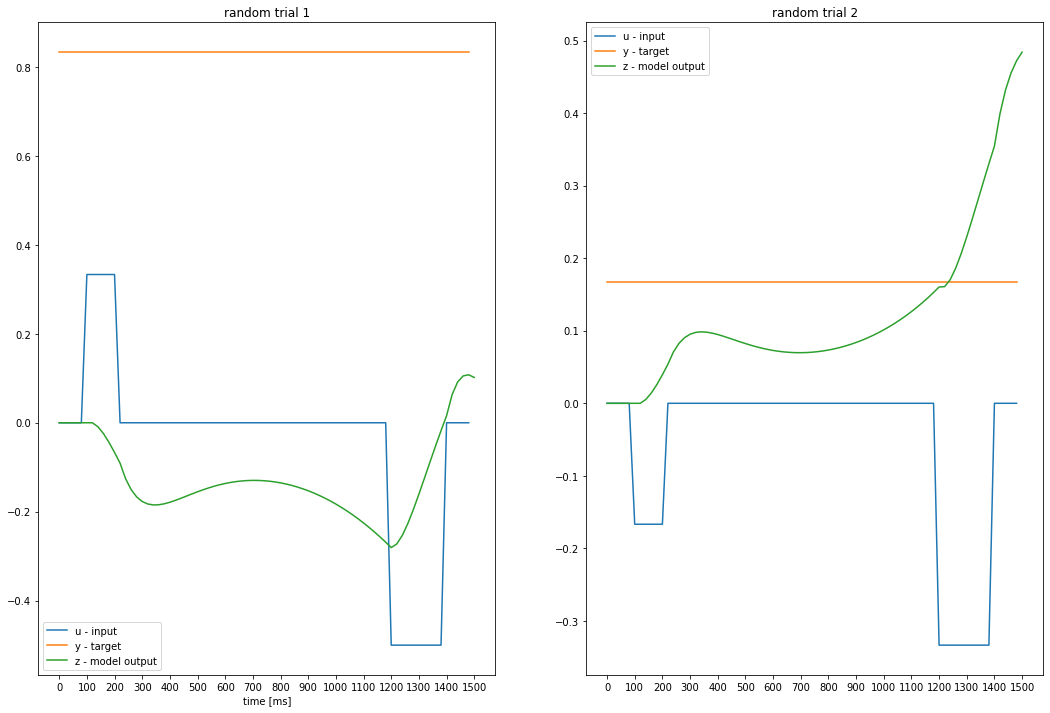

In [7]:
#check the equivalent one, two dimensional models
onedmodel= OneDimEquivalent(model_rank1)
twomodel= TwoDimEquivalent(model_rank2)

visITO(SingleDecisionDataset, onedmodel)
visITO(ParametricDataset, twomodel)


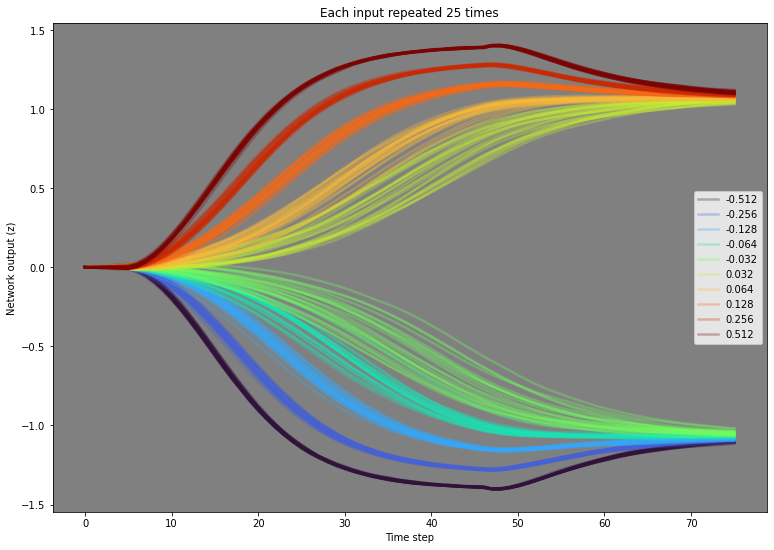

In [8]:

plot_input_range(onedmodel, 
               single_decision, 
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)

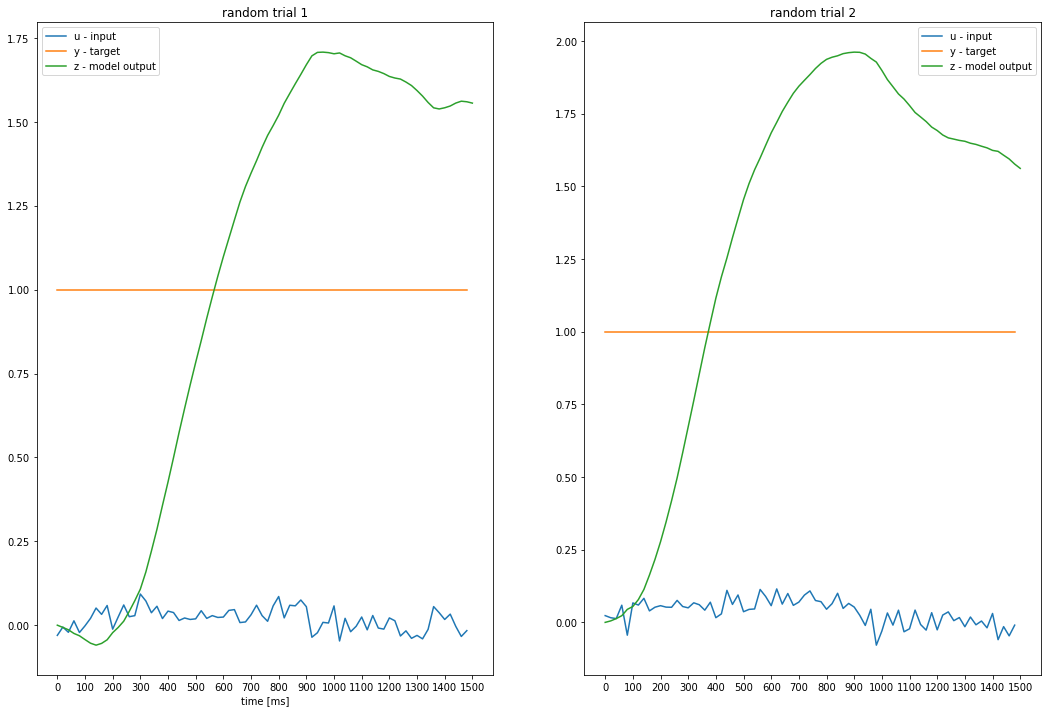

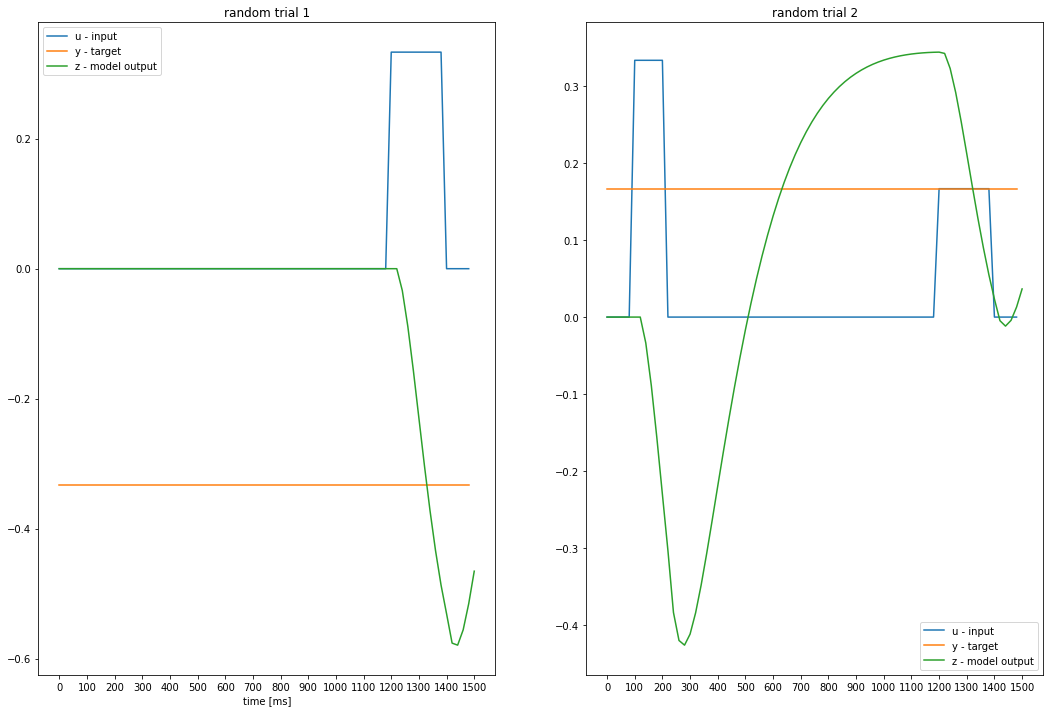

In [9]:
#check the equivalent one, two dimensional models
onedmodel_given= OneDimEquivalent(model_rank1,given_params=True)
twomodel_given= TwoDimEquivalent(model_rank2,given_params=True)

visITO(SingleDecisionDataset, onedmodel_given)
visITO(ParametricDataset, twomodel_given)


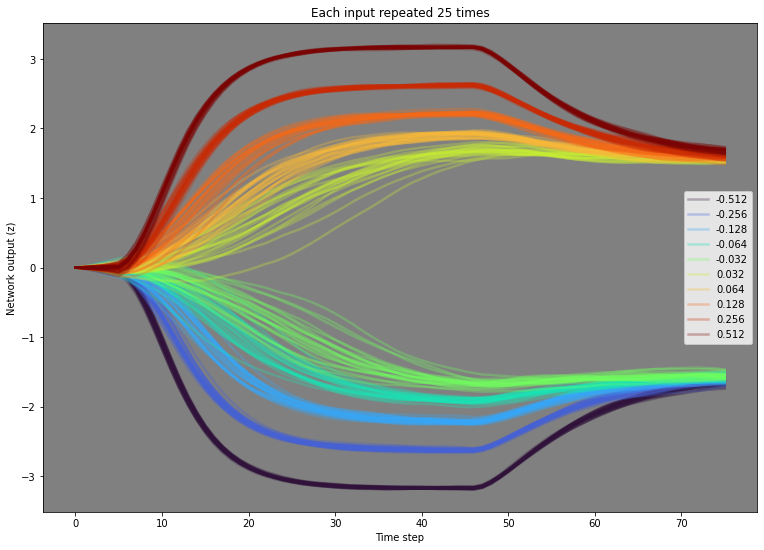

In [10]:

plot_input_range(onedmodel_given, 
                single_decision, 
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)

In [64]:
def plot_input_rank_two(model, in_vec1, in_vec2, expected_outs,
                     num_repeat=10,
                     alpha=0,
                     figsize=(8,6),
                     cmap_str='turbo',
                     background='grey',
                     linewidth=2.0):
    
    if alpha==0:
        alpha = 1/num_repeat
            
    cmap = plt.cm.get_cmap(cmap_str, len(expected_outs))
    tmp_u, tmp_y = parametric((in_vec1[0], in_vec2[0]))
 
    plt.figure(figsize=figsize)
    plt.xlabel("Time step")
    plt.ylabel("Network output (z)")
    #plt.title("Each input repeated {} times".format(num_repeat))
    
    
    out_dict = {}
    for i, o in enumerate(expected_outs):
        out_dict[o] = i
        plt.axhline(o, c=cmap(i), xmin=0.96, xmax=1.1, linewidth=linewidth, label="{:2.2}".format(o))
    
    #ax = plt.axes()
    #ax.set_facecolor("grey")

    for i, v1 in enumerate(in_vec1):
        for j, v2 in enumerate(in_vec2):
            data = np.zeros((num_repeat, tmp_u.shape[0]))

            for k in range(num_repeat):
                data[k], y = parametric((v1, v2))
            y = y.flatten()
            y = y[-1]
            
            color = cmap(out_dict[y])

            data = torch.Tensor(data)
            
            idx = i*len(in_vec2) + j
#             idx = j

            z = model(data).detach().numpy()
            if j == 0:
                plt.plot(z[0].T, c=color, alpha=alpha,
                         linewidth=linewidth)
            else:
                plt.plot(z[0].T, c=color, alpha=alpha,
                         linewidth=linewidth)
            if num_repeat > 1:
                plt.plot(z[1:].T, c=color,
                         alpha=alpha, linewidth=linewidth)
            
    ax = plt.gca()
    ax.set_facecolor(background)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()


{0.0, -0.5, -0.3333333333333333, -0.6666666666666666, -0.16666666666666666, -0.8333333333333334, 0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 1.0, 0.8333333333333334, -1.0}


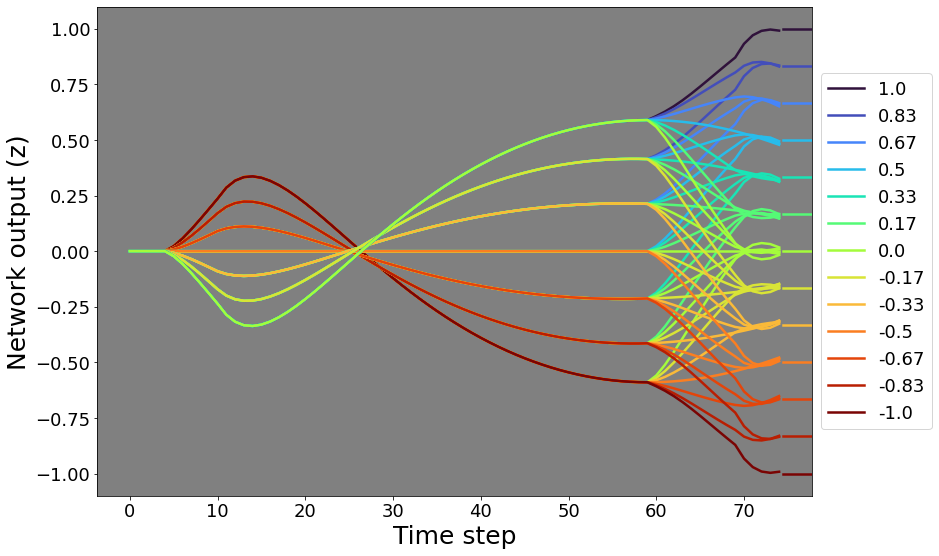

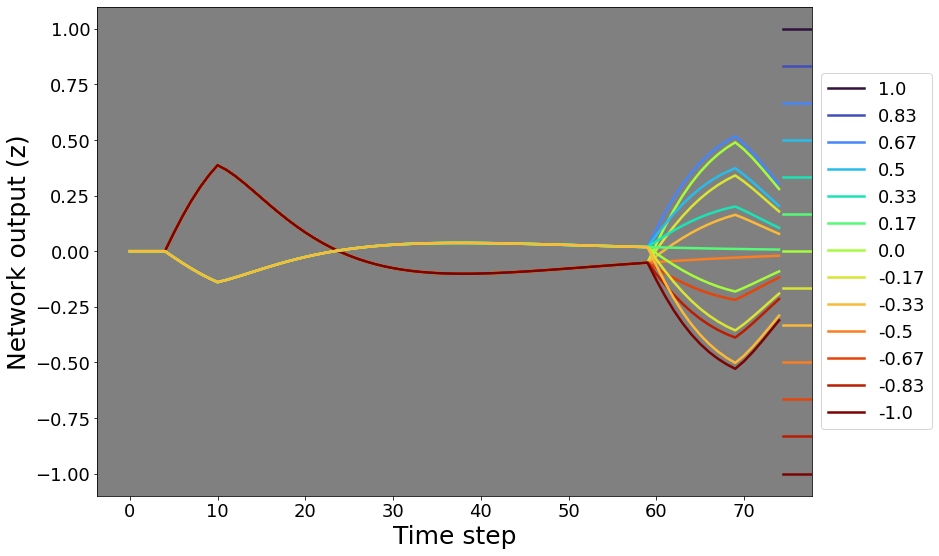

In [68]:
in_params = []

expected_out = set()

for i in [10,14,18,22,26,30,34]:
    for j in [10,14,18,22,26,30,34]:
        expected_out.add((i-j)/24)
        in_params.append((i,j)) 
        
print(expected_out)

fit_rank2 = FittedRNN(model_rank2)

SMALL_SIZE = 18
MEDIUM_SIZE = 25
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE) 


expected_out=list(expected_out)
expected_out.sort(reverse=True)
out_dict = {}    

fs = [10,14,18,22,26,30,34]
ffs = [10, 30,18, 22]

plot_input_rank_two(model_rank2, 
                fs, fs,
                expected_out, 
                alpha=1,
                num_repeat=1,
                figsize=(16, 9),
                linewidth=2.5)
plot_input_rank_two(fit_rank2, 
                [10, 26], fs,
                expected_out,
                alpha=1,
                num_repeat=1,
                figsize=(16, 9),
                linewidth=2.5)

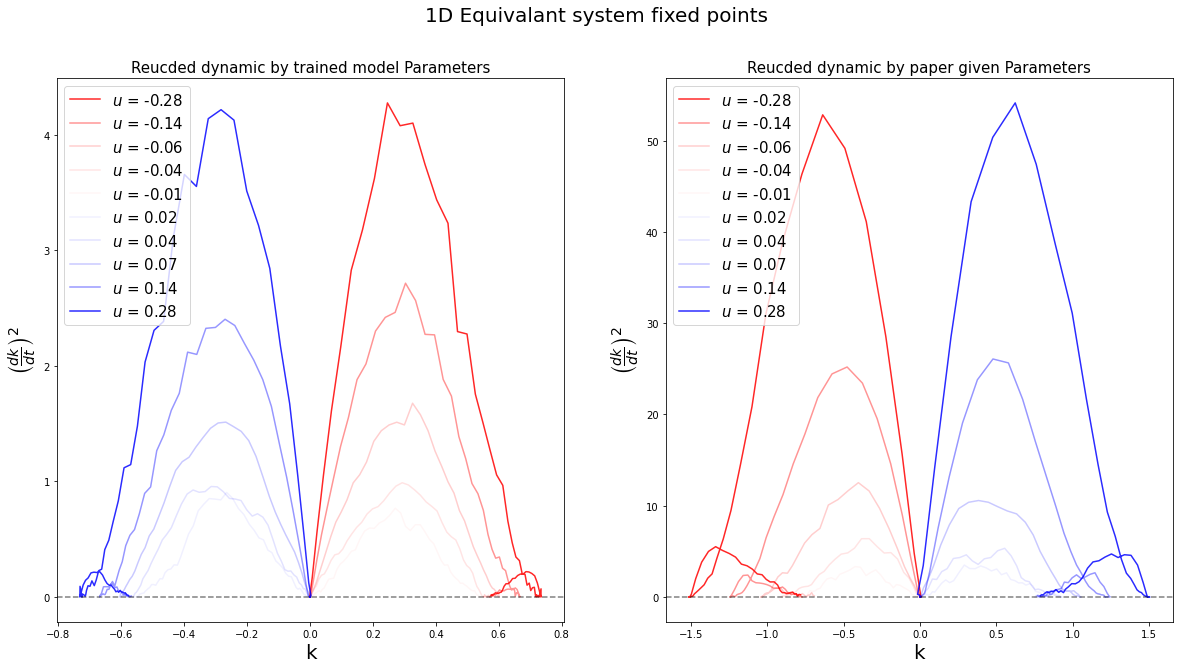

In [13]:

oneDfixedPointgiven=OneDimEquivalent(model_rank1,fixedPoint=True, given_params=True)
oneDfixedPoint=OneDimEquivalent(model_rank1,fixedPoint=True, given_params=False)

strength=(3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16])
fun=single_decision
u=np.zeros((10,75))
y=np.zeros((10,75))
for i in range(10):
    u[i,:], y[i,:]=fun(strength[i])

u=torch.tensor(u).float()
y=torch.tensor(y).float()

k,dk=oneDfixedPoint(u)
k_given,dk_given=oneDfixedPointgiven(u)

k=k.squeeze().detach().numpy()
k_given=k_given.squeeze().detach().numpy()
dk=dk.squeeze().detach().numpy()
dk_given=dk_given.squeeze().detach().numpy()
dk=dk**2
dk_given=dk_given**2

plt.figure(figsize=(20,10))
plt.suptitle('1D Equivalant system fixed points', fontsize=20)
plt.subplot(1,2,1)
ax=plt.gca()
ax.set_title('Reucded dynamic by trained model Parameters', fontsize=15)
for i in range(10):
    meanu=u[i].mean().item()
    if meanu > 0:
        plt.plot(k[i],dk[i], label=r'${}$ = {strng:.2f}'.format("u",strng=u[i].mean().item()), color='blue', alpha=3*meanu)
    else:
        plt.plot(k[i],dk[i], label=r'${}$ = {strng:.2f}'.format("u",strng=u[i].mean().item()), color='red', alpha=3*-meanu)
plt.axhline(0,color="black", alpha=0.5, linestyle='--')
plt.xlabel('k', fontsize=20)
plt.ylabel(r'$\left(\frac{dk}{dt}\right)^2$',fontsize=20)
handles, labels = plt.gca().get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0].split('=')[1])))
plt.legend(handles, labels, loc='upper left' ,fontsize=15)

plt.subplot(1,2,2)
ax=plt.gca()
ax.set_title('Reucded dynamic by paper given Parameters', fontsize=15)
for i in range(10):
    meanu=u[i].mean().item()
    if meanu > 0:
        plt.plot(k_given[i],dk_given[i], label=r'${}$ = {strng:.2f}'.format("u",strng=u[i].mean().item()), color='blue', alpha=3*meanu)
    else:
        plt.plot(k_given[i],dk_given[i], label=r'${}$ = {strng:.2f}'.format("u",strng=u[i].mean().item()), color='red', alpha=3*-meanu)
plt.axhline(0,color="black", alpha=0.5, linestyle='--')
plt.xlabel('k', fontsize=20)
plt.ylabel(r'$\left(\frac{dk}{dt}\right)^2$',fontsize=20)

handles, labels = plt.gca().get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0].split('=')[1])))
plt.legend(handles, labels, loc='upper left',fontsize=15)